In [16]:
from random import choice

class RandomWalk:
  """A class to generate random walks."""

  def __init__(self, num_points=5000):
    self.num_points = num_points

    self.x_values = [0]
    self.y_values = [0]

  def fill_walk(self):
    while len(self.x_values) < self.num_points:
      x_direction = choice([1, -1])
      x_distance = choice([0, 1, 2, 3, 4])
      x_step = x_direction * x_distance

      y_direction = choice([1, -1])
      y_distance = choice([0, 1, 2, 3, 4])
      y_step = y_direction * y_distance
      
      # Reject moves taht go nowhere.
      if x_step == 0 and y_step == 0:
        continue

      # Calculate the new position.
      x = self.x_values[-1] + x_step
      y = self.y_values[-1] + y_step

      self.x_values.append(x)
      self.y_values.append(y)

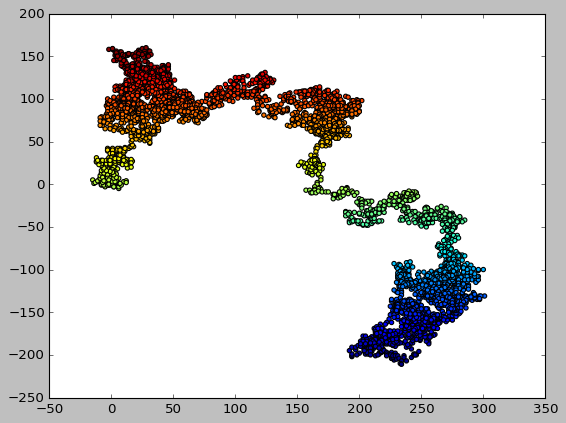

In [25]:
import matplotlib.pyplot as plt

rw = RandomWalk()
rw.fill_walk()

# Plot the points in the walk.
plt.style.use('classic')
fig, ax = plt.subplots()
ax.scatter(rw.x_values, rw.y_values, c=rw.y_values, s=15)

plt.show()


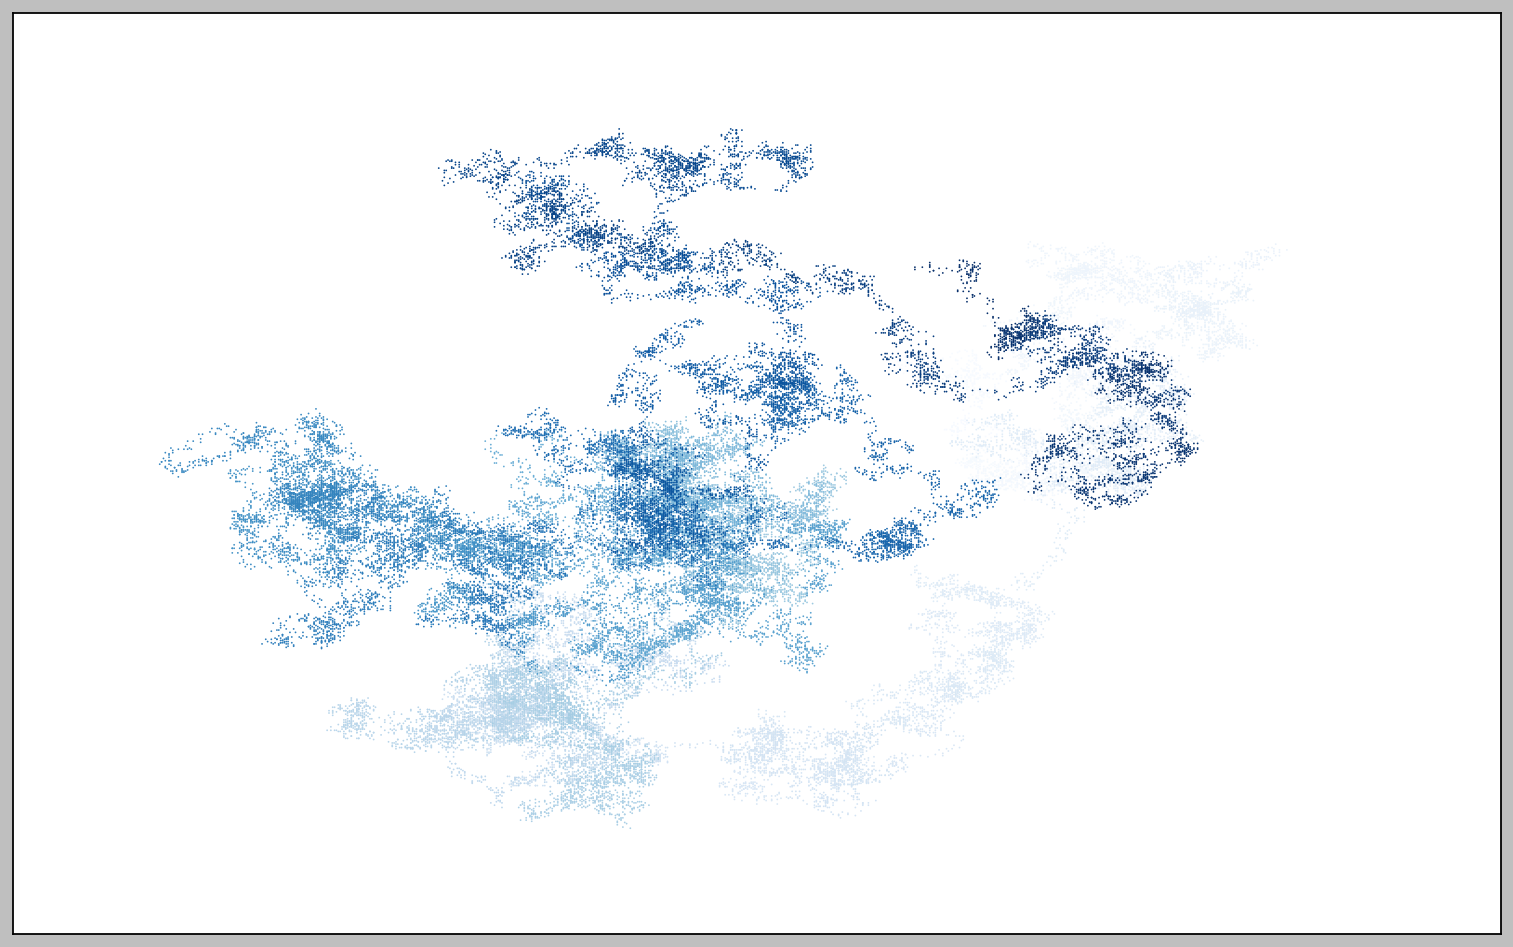

In [34]:
while True:
  rw = RandomWalk(50_000)
  rw.fill_walk()

  # Plot the points in the walk.
  plt.style.use('classic')

  # altering the size to fill the screen
  fig, ax = plt.subplots(figsize=(15,9), dpi=128)

  # coloring the Points
  point_numbers = range(rw.num_points)
  # ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolors='none', s=15)

  # adding plot point
  ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolors='none', s=1)

  # remove the axeis.
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  plt.show()

  keep_running = input("Make another walk?(y/n): ")
  if keep_running == 'n':
    break


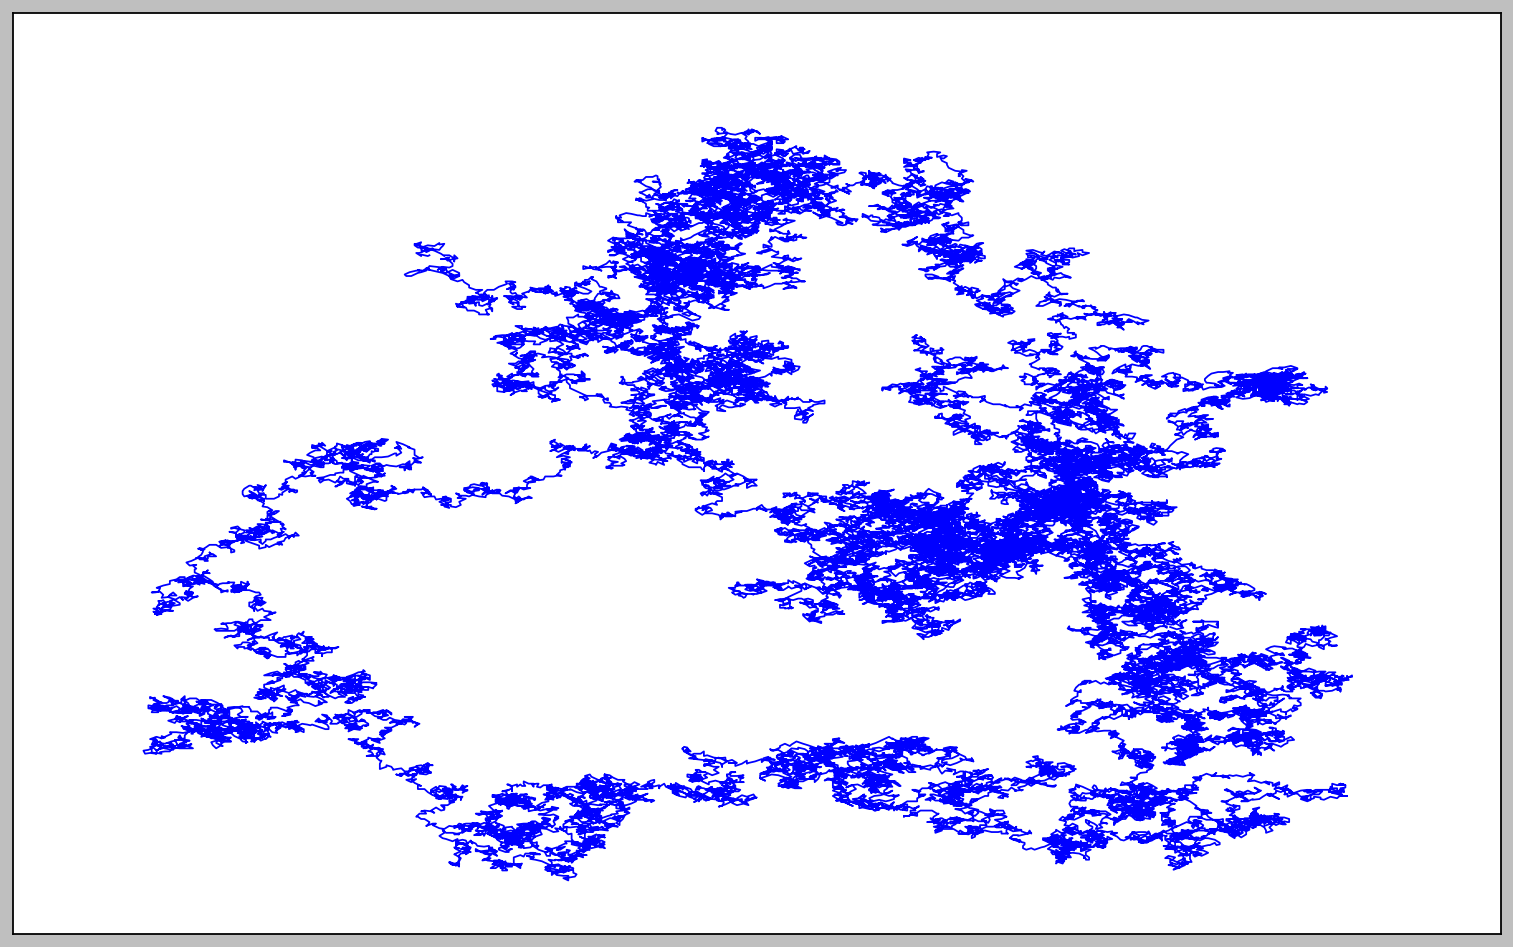

In [35]:
"""
15-3. Molecular Motion: Modify rw_visual.py by replacing plt.scatter() with plt.plot().
To simulate the path of a pollen grain on the surface of a drop of water, pass in the
 rw.x_values and rw.y_values, and include a linewidth argu-ment. Use 5000 instead of 
 50,000 points.
"""

rw = RandomWalk(5_000)
rw.fill_walk()

plt.style.use('classic')

fig, ax = plt.subplots(figsize=(15,9), dpi=128)
point_numbers = range(rw.num_points)
ax.plot(rw.x_values, rw.y_values)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()



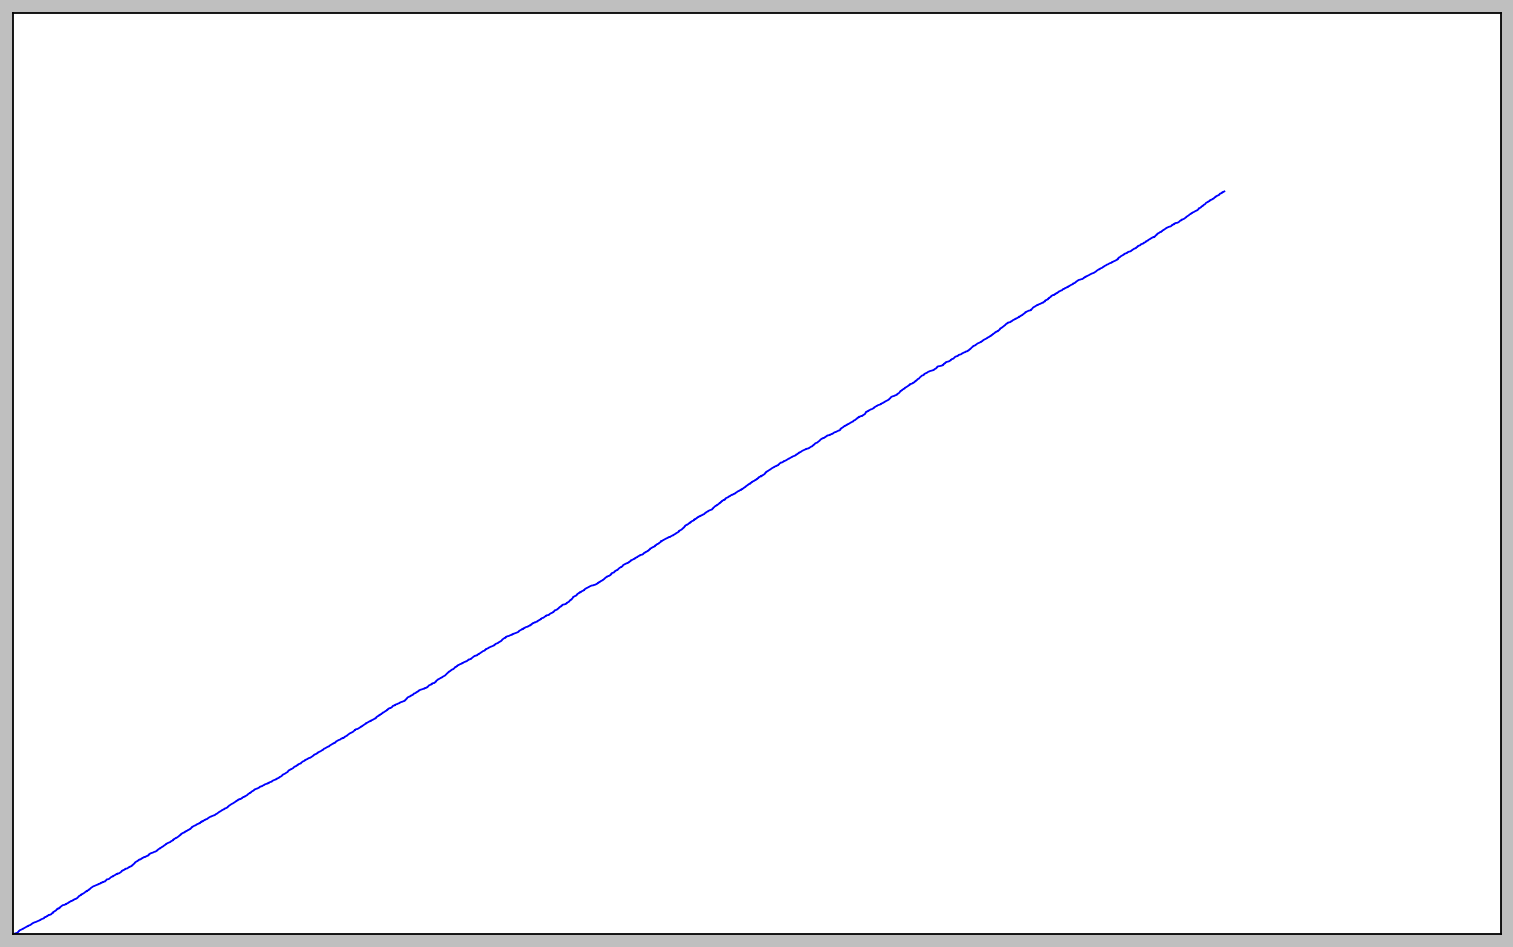

In [43]:
""" 
15-4. Modified Random Walks: In the RandomWalk class, x_step and y_step are generated
from the same set of conditions. The direction is chosen randomly from the list [1, -1]
and the distance from the list [0, 1, 2, 3, 4]. Modify the values in these lists to see
what happens to the overall shape of your walks. Try a longer list of choices for the
distance, such as 0 through 8, or remove the −1 from the x or y direction list.
"""
class RandomWalk2:
  """A class to generate random walks."""

  def __init__(self, num_points=5000):
    self.num_points = num_points

    self.x_values = [0]
    self.y_values = [0]

  def fill_walk(self):
    while len(self.x_values) < self.num_points:
      x_direction = choice([1])
      x_distance = choice([0, 1, 2, 3, 4, 5, 6, 7, 8])
      x_step = x_direction * x_distance

      y_direction = choice([1])
      y_distance = choice([0, 1, 2, 3, 4, 5, 6, 7, 8])
      y_step = y_direction * y_distance
      
      # Reject moves taht go nowhere.
      if x_step == 0 and y_step == 0:
        continue

      # Calculate the new position.
      x = self.x_values[-1] + x_step
      y = self.y_values[-1] + y_step

      self.x_values.append(x)
      self.y_values.append(y)

rw = RandomWalk2(5_000)
rw.fill_walk()

plt.style.use('classic')

fig, ax = plt.subplots(figsize=(15,9), dpi=128)
point_numbers = range(rw.num_points)
ax.plot(rw.x_values, rw.y_values)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()


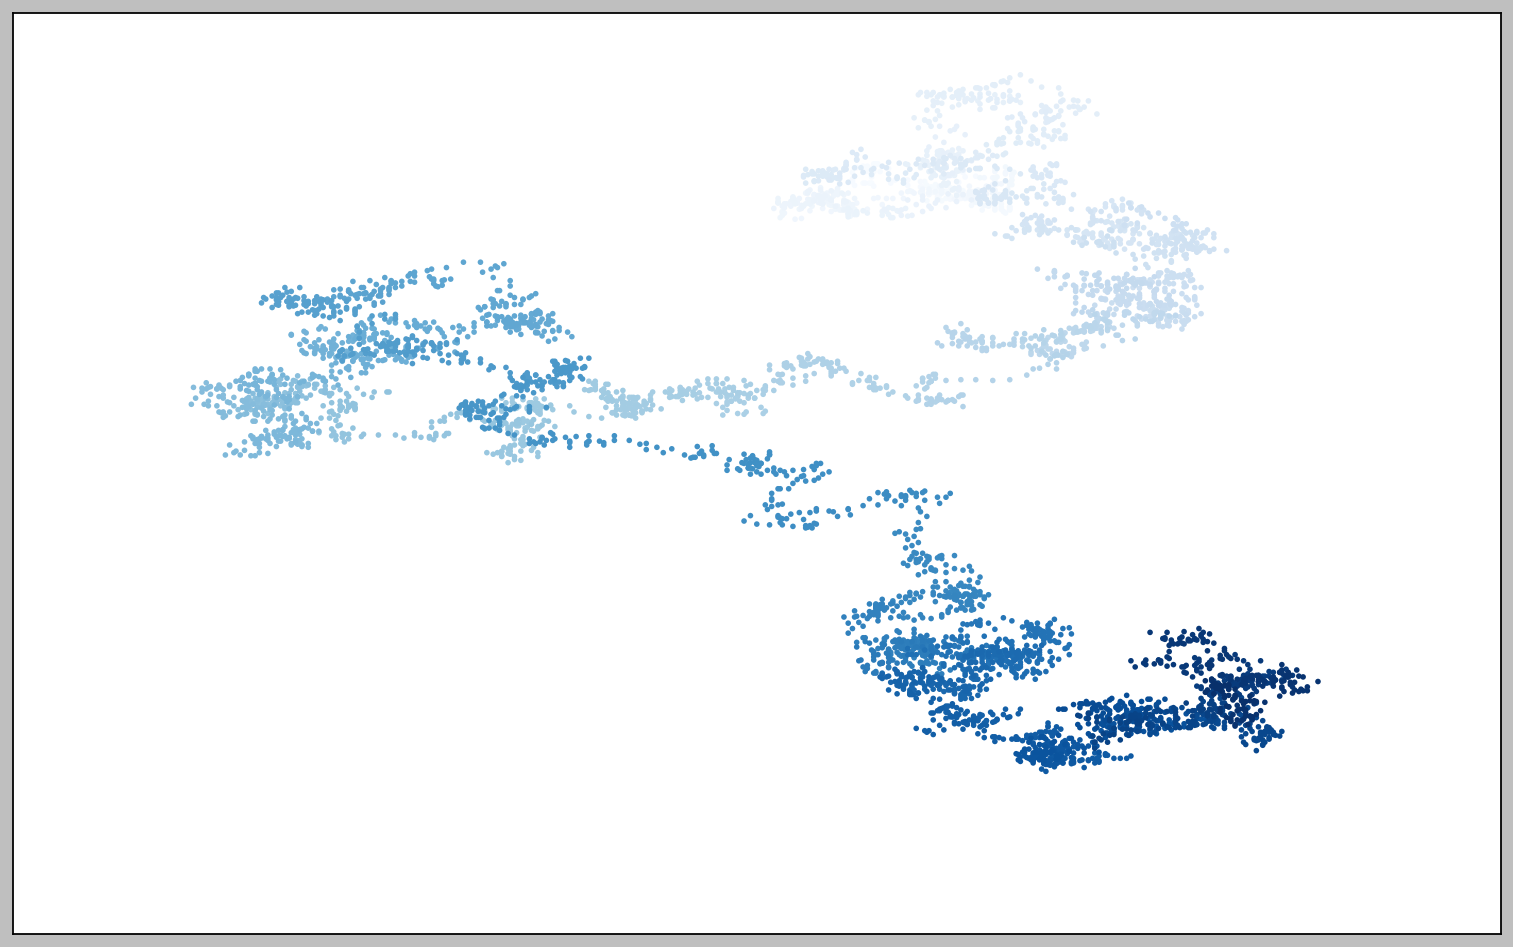

In [51]:
"""
15-5. Refactoring: The fill_walk() method is lengthy. Create a new method called get_step()
to determine the direction and distance for each step, and then calculate the step.
You should end up with two calls to get_step() in fill_walk():
---
x_step = self.get_step()
y_step = self.get_step()
---

This refactoring should reduce the size of fill_walk() and make the method easier to read 
and understand

"""

class RandomWalk3():
  def __init__(self, num_points=5000):
    self.num_points = num_points

    self.x_values = [0]
    self.y_values = [0]
  
  
  def fill_walk(self):
    while len(self.x_values) < self.num_points:
      x_step = self.get_step()
      y_step = self.get_step()

      # Reject moves taht go nowhere.
      if x_step == 0 and y_step == 0:
        continue

      # Calculate the new position.
      x = self.x_values[-1] + x_step
      y = self.y_values[-1] + y_step

      self.x_values.append(x)
      self.y_values.append(y)

  
  def get_step(self):
    direction = choice([1, -1])
    distance = choice([0, 1, 2, 3, 4, 5, 6, 7, 8])
    return direction * distance

rw = RandomWalk3(5_000)
rw.fill_walk()

fig, ax = plt.subplots(figsize=(15,9), dpi=128)
point_numbers = range(rw.num_points)
ax.scatter(rw.x_values, rw.y_values, c=point_numbers, cmap=plt.cm.Blues, edgecolor='none', s=10)

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()